# **Heart Disease Prediction Using Logistic Regression**

# Importing libraries

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Read the data and manipulation

In [38]:
df = pd.read_csv('data/framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [40]:
df_nulls = df.isnull().sum().sort_values(ascending=False)
print(df_nulls)

glucose            388
education          105
BPMeds              53
totChol             50
cigsPerDay          29
BMI                 19
heartRate            1
male                 0
age                  0
currentSmoker        0
prevalentStroke      0
prevalentHyp         0
diabetes             0
sysBP                0
diaBP                0
TenYearCHD           0
dtype: int64


In [41]:
from sklearn.impute import SimpleImputer
df.drop(columns=['education'], inplace = True, axis = 1) #useless

imputer_glu = SimpleImputer(strategy='mean')
df[['glucose']] = imputer_glu.fit_transform(df[['glucose']])

df.dropna(inplace=True)
df.isnull().sum().sort_values(ascending=False)


male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4090 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4090 non-null   int64  
 1   age              4090 non-null   int64  
 2   currentSmoker    4090 non-null   int64  
 3   cigsPerDay       4090 non-null   float64
 4   BPMeds           4090 non-null   float64
 5   prevalentStroke  4090 non-null   int64  
 6   prevalentHyp     4090 non-null   int64  
 7   diabetes         4090 non-null   int64  
 8   totChol          4090 non-null   float64
 9   sysBP            4090 non-null   float64
 10  diaBP            4090 non-null   float64
 11  BMI              4090 non-null   float64
 12  heartRate        4090 non-null   float64
 13  glucose          4090 non-null   float64
 14  TenYearCHD       4090 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 511.2 KB


# Splitting the Dataset into Test and Train Sets 

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features & target
X = df[['age', 'male', 'cigsPerDay', 'totChol', 'sysBP', 'glucose']].values
y = df['TenYearCHD'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)


scaler = StandardScaler()
X_train, X_test = scaler.fit_transform(X_train), scaler.transform(X_test)

print('Train:', X_train.shape, y_train.shape)
print('Test:', X_test.shape, y_test.shape)


Train: (2863, 6) (2863,)
Test: (1227, 6) (1227,)


# Visualization
*Ten Year's CHD Record of all the patients available in the dataset*

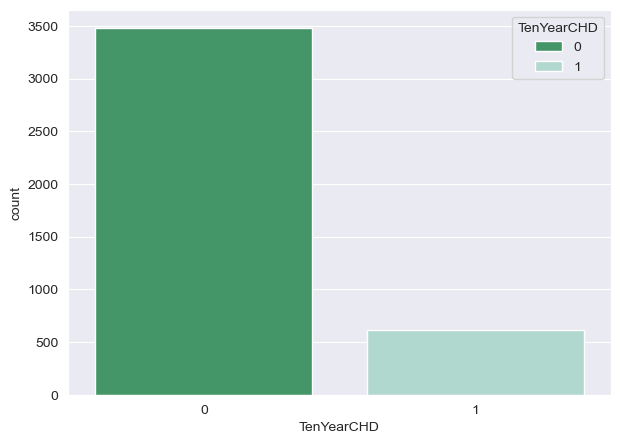

In [44]:
plt.figure(figsize=(7, 5))
sns.countplot(x='TenYearCHD', data=df,
             palette="BuGn_r", hue='TenYearCHD')
plt.show()

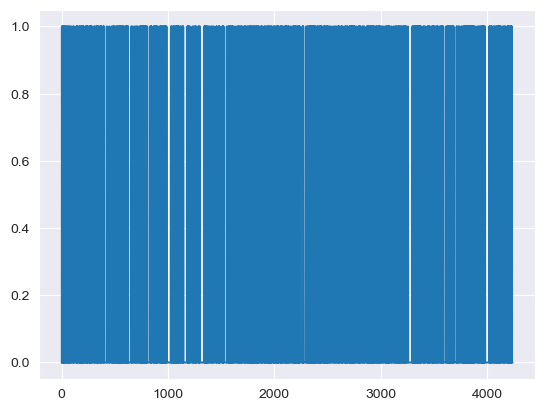

In [45]:
#Counting number of patients affected by CHD where (0= Not Affected; 1= Affected)
laste = df['TenYearCHD'].plot()
plt.show(laste)

# Fitting Logistic Regression Model

In [46]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [47]:
log_reg_acc = round(logreg.score(X_train,y_train), 2)
print(f'\nModel Accuracy: {log_reg_acc * 100:.2f} %')


Model Accuracy: 85.00 %


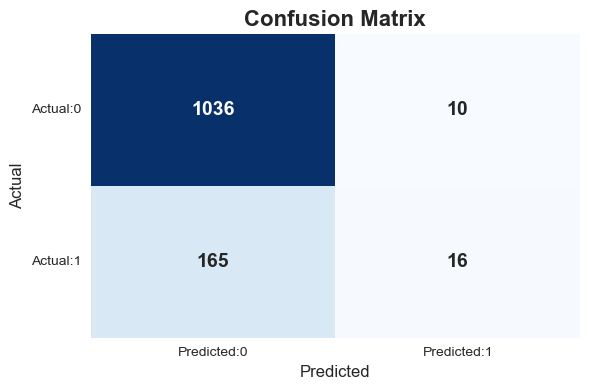

In [49]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(
    cm, 
    columns=['Predicted:0', 'Predicted:1'], 
    index=['Actual:0', 'Actual:1']
)

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", cbar=False, 
            annot_kws={"size":14, "weight":"bold"})
plt.title("Confusion Matrix", fontsize=16, weight='bold')
plt.ylabel("Actual", fontsize=12)
plt.xlabel("Predicted", fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
